<a href="https://colab.research.google.com/github/MKeel1ng/DailyMailAnalysis/blob/master/DailyMail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the necessary packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import tqdm

In [2]:
path='/content/drive/MyDrive/DailyMail/'

# Data Scraping

## get all urls

In [ ]:
def get_all_links(url):
  print(url)
  response = requests.get(url) 
  soup = BeautifulSoup(response.text, 'html.parser') 
  all_a=soup.findAll('a')

  return all_a

def get_news_links(url):
  response = requests.get(url) 
  soup = BeautifulSoup(response.text, 'html.parser') 
  all_a=soup.find('ul',class_='archive-articles debate link-box').findAll('a')
  return all_a

def clean_links(contains,all_a):
  list_of_links=[]
  for i in range(len(all_a)):
    try:
      
      href=all_a[i]['href']

      if contains in href:
          list_of_links.append(href)
    except:
      continue
  return list_of_links

In [ ]:
# url_2021='https://www.dailymail.co.uk/home/sitemaparchive/year_2021.html'
url_2021='https://www.dailymail.co.uk/home/sitemaparchive/year_2020.html'
links2021=get_all_links(url_2021)
days2021=clean_links('/day_',links2021)



https://www.dailymail.co.uk/home/sitemaparchive/year_2020.html


In [ ]:
len(days2021)

366

In [ ]:
df=pd.DataFrame(columns=['date','type','link','title'])
id=0
for j,day in tqdm.tqdm(enumerate(days2021)):

  if j>=219:
    url='https://www.dailymail.co.uk'+day

    date=day.split('/')[-1].split('_')[-1].split('.')[0]

    news_=get_news_links(url) 
    for i in range(len(news_)):
      link=news_[i]['href']
      title=news_[i].get_text()
      articleType=link.split('/')[1]
      
    
      df_dict={'date':date,'type':articleType,'link':link,'title':title}
      id+=1
      row_df=pd.DataFrame(df_dict,index=[id])
      df=df.append(row_df,ignore_index=True)




366it [49:04,  8.04s/it]


219 its sorted

In [ ]:
df2=df.drop_duplicates().copy()

In [ ]:
df2

,date,type,link,title
0,20200506,femail,/femail/article-8294989/Career-experts-reveal-...,How to sell yourself in 25 words or less: Care...
1,20200506,tvshowbiz,/tvshowbiz/article-8294987/Jenna-Dewan-says-da...,"Jenna Dewan says daughter Everly, six, has 'st..."
2,20200506,news,/news/fb-8294985/Is-meat-affected-factories-sa...,Is meat from affected factories safe to eat?
3,20200506,wires,/wires/reuters/article-8294983/Reuters-Sports-...,Reuters Sports News Summary
4,20200506,wires,/wires/afp/article-8294981/New-US-school-sexua...,New US school sexual assault rules enforce rig...
...,...,...,...,...
244283,20200131,femail,/femail/food/article-7950265/Cadbury-Creme-Egg...,Shoppers go wild over a chocolate block versio...
244284,20200131,news,/news/article-7950263/Woman-dressed-Minnie-Mou...,Shocking moment woman dressed as Minnie Mouse ...
244285,20200131,wires,/wires/ap/article-7950259/Perez-leads-Gardner-...,Perez leads Gardner-Webb past UNC Asheville 70-56
244286,20200131,wires,/wires/ap/article-7950261/Trial-highlights-Der...,"Trial highlights: Alexander decides, Dershowit..."


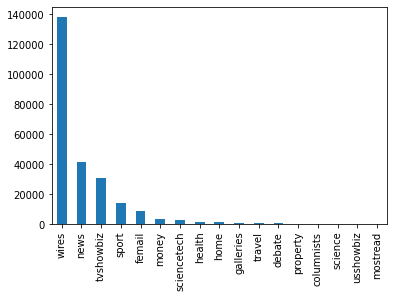

In [ ]:
df2['type'].value_counts().plot.bar()

In [ ]:
df2.to_csv(path+'DailyMail2020_219days_2.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1=pd.read_csv(path+'DailyMail2020_219days.csv')

In [ ]:
df_all=pd.concat([df1,df2],ignore_index=True)
df_all

,Unnamed: 0,date,type,link,title
0,0.0,20201201,news,/news/article-9007815/NSW-Central-Coast-Diamon...,Terrifying moment a diamond python slithers do...
1,1.0,20201201,wires,/wires/ap/article-9007813/No-9-Creighton-routs...,No. 9 Creighton routs Omaha 94-67 with Bishop ...
2,2.0,20201201,wires,/wires/ap/article-9007811/Liverpool-Porto-adva...,"Liverpool and Porto advance, but Real Madrid i..."
3,3.0,20201201,wires,/wires/aap/article-9007809/NRL-star-Jack-Belin...,NRL star Jack de Belin's retrial in April
4,4.0,20201201,wires,/wires/reuters/article-9007807/Warriors-Wizard...,"Warriors, Wizards have COVID-19 positives"
...,...,...,...,...,...
601020,NaN,20200131,femail,/femail/food/article-7950265/Cadbury-Creme-Egg...,Shoppers go wild over a chocolate block versio...
601021,NaN,20200131,news,/news/article-7950263/Woman-dressed-Minnie-Mou...,Shocking moment woman dressed as Minnie Mouse ...
601022,NaN,20200131,wires,/wires/ap/article-7950259/Perez-leads-Gardner-...,Perez leads Gardner-Webb past UNC Asheville 70-56
601023,NaN,20200131,wires,/wires/ap/article-7950261/Trial-highlights-Der...,"Trial highlights: Alexander decides, Dershowit..."


In [ ]:
df_all.to_csv(path+'DailyMail2020.csv')

# Topic Modelling

In [ ]:
df=pd.read_csv(path+'DailyMail2020.csv')

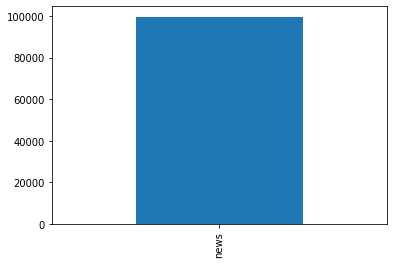

In [ ]:
df['type'].value_counts().plot.bar()

In [ ]:
df=df[df['type']=='news']

In [ ]:
df=df.reset_index()

In [ ]:
df.head()

,index,Unnamed: 0,Unnamed: 0.1,date,type,link,title
0,0,0,0.0,20201201,news,/news/article-9007815/NSW-Central-Coast-Diamon...,Terrifying moment a diamond python slithers do...
1,10,10,10.0,20201201,news,/news/article-9007795/Cost-class-stamps-rise-7...,Cost of first class stamp rises 9 pence to 85p...
2,15,15,15.0,20201201,news,/news/article-9007785/Cop-shot-injured-naked-u...,Cop is fired for shooting an unarmed naked man...
3,16,16,16.0,20201201,news,/news/article-9007783/San-Francisco-mayor-Lond...,San Francisco mayor London Breed - who imposed...
4,18,18,18.0,20201201,news,/news/article-9007779/Ahmed-Jaghbir-jailed-11-...,The secret mistress and the ultimate betrayal:...


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

stemmer = SnowballStemmer('english')

In [ ]:
doc_sample = df.iloc[0].title
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Terrifying', 'moment', 'a', 'diamond', 'python', 'slithers', 'down', 'a', 'suburban', 'window', 'after', 'spending', 'a', 'whole', 'YEAR', 'lurking', 'on', 'the', 'roof', 'of', 'the', 'house\xa0']


 tokenized and lemmatized document: 
['terrifi', 'moment', 'diamond', 'python', 'slither', 'suburban', 'window', 'spend', 'year', 'lurk', 'roof', 'hous']


In [ ]:
df.iloc[4310].title

"'I've changed my festive plans... and so should you': Priti Patel says she will not be visiting her parents for Christmas after urging people to shop neighbours for having 'raves'\xa0"

In [ ]:
processed_docs = df['title'].map(preprocess)
processed_docs[:10]

0    [terrifi, moment, diamond, python, slither, su...
1    [cost, class, stamp, rise, penc, royal, mail, ...
2    [fire, shoot, unarm, nake, hide, dumpster, car...
3    [francisco, mayor, london, breed, impos, citi,...
4    [secret, mistress, ultim, betray, insid, stori...
5    [rita, launch, wagatha, christi, style, probe,...
6    [helpless, neighbour, horror, watch, woman, ga...
7    [scott, morrison, appeal, chines, australian, ...
8    [incred, kilo, mega, burger, diner, line, tast...
9    [year, hell, pictur, coronavirus, pandem, chan...
Name: title, dtype: object

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 diamond
1 hous
2 lurk
3 moment
4 python
5 roof
6 slither
7 spend
8 suburban
9 terrifi
10 window


In [ ]:
len(dictionary)

26289

In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.85, keep_n=1000)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(51, 1),
 (70, 1),
 (114, 1),
 (148, 1),
 (225, 1),
 (290, 1),
 (349, 1),
 (436, 1),
 (443, 1),
 (518, 1),
 (624, 1),
 (625, 1)]

In [ ]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 51 ("neighbour") appears 1 time.
Word 70 ("chang") appears 1 time.
Word 114 ("plan") appears 1 time.
Word 148 ("say") appears 1 time.
Word 225 ("peopl") appears 1 time.
Word 290 ("urg") appears 1 time.
Word 349 ("have") appears 1 time.
Word 436 ("christma") appears 1 time.
Word 443 ("visit") appears 1 time.
Word 518 ("parent") appears 1 time.
Word 624 ("festiv") appears 1 time.
Word 625 ("shop") appears 1 time.


In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.35681686999336354),
 (1, 0.31537119240045747),
 (2, 0.4486038889213911),
 (3, 0.4804146283472871),
 (4, 0.5371113015408856),
 (5, 0.2295441521007466)]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora

In [ ]:
dirichlet_dict = dictionary


# Considering 1-15 topics, as the last is cut off
num_topics = list(range(25)[1:])
num_keywords = 15

LDA_models = {}
LDA_topics = {}
for i in num_topics:
    print(i)
    LDA_models[i] =gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=dirichlet_dict, passes=10, workers=8)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [ ]:
LDA_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    LDA_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

In [ ]:
coherences = [CoherenceModel(model=LDA_models[i], texts=processed_docs, dictionary=dirichlet_dict, coherence='c_v').get_coherence() for i in num_topics[:-1]]

In [ ]:
coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-2]] # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

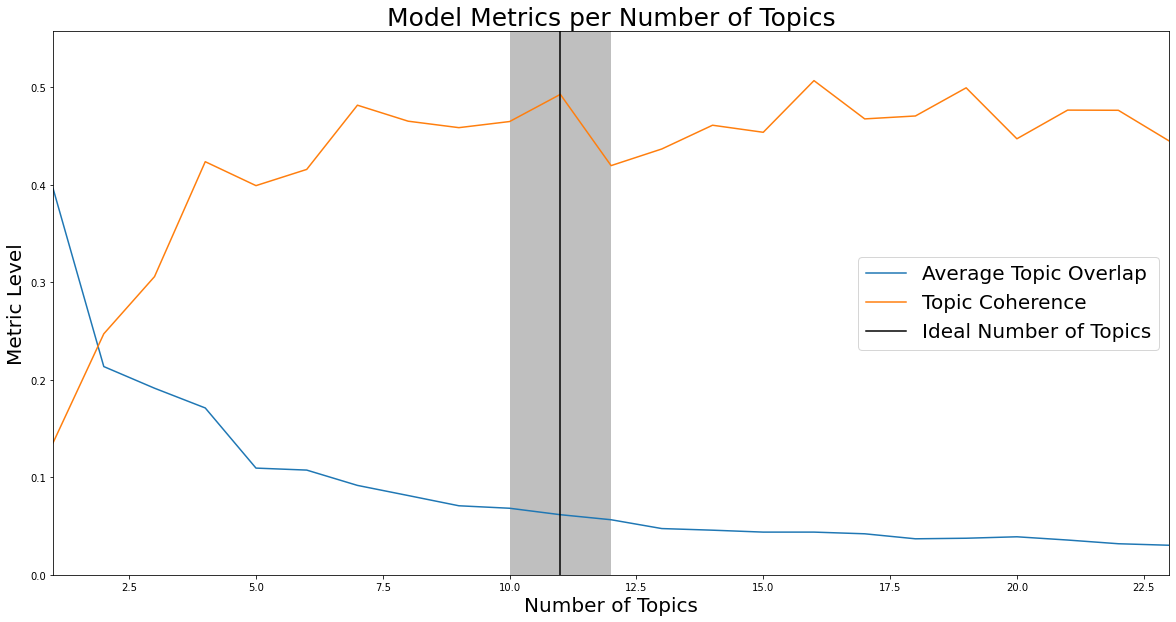

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1]-1])
                
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()   

Ideal number of topics is 10

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=11, id2word=dictionary, passes=25, workers=2)

In [ ]:
lda_model.save(path+'BestLDA_2020')

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.042*"school" + 0.025*"student" + 0.022*"year" + 0.021*"post" + 0.019*"children" + 0.018*"look" + 0.017*"photo" + 0.016*"reveal" + 0.016*"like" + 0.015*"deal"
Topic: 1 
Words: 0.058*"polic" + 0.047*"moment" + 0.027*"driver" + 0.026*"offic" + 0.021*"shock" + 0.019*"arrest" + 0.017*"cop" + 0.015*"woman" + 0.014*"protest" + 0.013*"show"
Topic: 2 
Words: 0.081*"coronavirus" + 0.036*"case" + 0.030*"death" + 0.023*"china" + 0.020*"warn" + 0.018*"york" + 0.017*"second" + 0.017*"record" + 0.016*"covid" + 0.016*"infect"
Topic: 3 
Words: 0.031*"princ" + 0.029*"harri" + 0.027*"british" + 0.023*"meghan" + 0.023*"star" + 0.022*"flight" + 0.020*"royal" + 0.019*"travel" + 0.017*"hotel" + 0.015*"quarantin"
Topic: 4 
Words: 0.043*"year" + 0.037*"murder" + 0.036*"jail" + 0.033*"charg" + 0.028*"accus" + 0.023*"court" + 0.017*"prison" + 0.017*"claim" + 0.017*"women" + 0.016*"victim"
Topic: 5 
Words: 0.034*"lockdown" + 0.029*"warn" + 0.028*"coronavirus" + 0.028*"bori" + 0.026*"johnson" + 

In [ ]:
processed_docs[6]

['helpless',
 'neighbour',
 'horror',
 'watch',
 'woman',
 'gasp',
 'window',
 'townhous',
 'gut',
 'rescu',
 'crew',
 'recov',
 'bodi',
 'wreckag']

In [ ]:
df.head(10)

,index,Unnamed: 0,date,type,link,title
0,0,0,20210401,news,/news/article-9429149/Watchdog-calls-ramblers-...,Minorities 'don't feel welcome in the countrys...
1,4,4,20210401,news,/news/article-9429143/Nurse-pay-app-goes-bust-...,Nurse pay app goes bust after finance company ...
2,10,10,20210401,news,/news/article-9429131/Britain-comes-roaring-pa...,Factory growth hits ten-year high: Britain com...
3,14,14,20210401,news,/news/article-9429125/UK-regulator-total-30-ca...,Seven British people died from a brain blood c...
4,22,22,20210401,news,/news/article-9429107/Drunken-Walmart-shoplift...,Fight breaks out in Walmart when customer take...
5,26,26,20210401,news,/news/article-9429099/Fear-tanking-job-prospec...,Fear of tanking job prospects for under 25s: Y...
6,28,28,20210401,news,/news/article-9429095/UK-taxpayers-pumped-21m-...,Furious Tory MP urges No10 to demand refund of...
7,36,36,20210401,news,/news/article-9429079/ER-doctor-opens-adverse-...,Australian ER doctor describes the 'shocking'...
8,37,37,20210401,news,/news/article-9429077/Science-supports-use-pub...,Science that supports use of puberty blockers ...
9,45,45,20210401,news,/news/article-9429059/Garden-experts-say-letti...,Make yours a lazy lawn: Garden experts say let...


In [ ]:
for index, score in sorted(lda_model[bow_corpus[6]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.5852959156036377	 
Topic: 0.034*"dead" + 0.024*"home" + 0.020*"shoot" + 0.017*"bushfir" + 0.017*"stab" + 0.014*"sydney" + 0.014*"leav" + 0.013*"polic" + 0.013*"london" + 0.013*"water"

Score: 0.3328815698623657	 
Topic: 0.034*"year" + 0.032*"die" + 0.031*"mother" + 0.024*"famili" + 0.023*"kill" + 0.021*"wife" + 0.021*"father" + 0.019*"reveal" + 0.017*"life" + 0.017*"daughter"


# Sentiment Analysis

In [ ]:
!pip3 install flair
import flair

In [ ]:
dfsent=df

In [ ]:
# dfsent=dfsent.drop(['index','Unnamed: 0'],axis=1)
dfsent['Sentiment']=0
dfsent.head()


In [ ]:
svals=[]
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
for i in tqdm.tqdm(range(len(dfsent))):
  sentence=df.iloc[i].title
  s = flair.data.Sentence(sentence)
  flair_sentiment.predict(s)
  total_sentiment = s.labels
  svals.append(str(total_sentiment[0]).split(' ')[0])
  
  

2021-04-14 14:37:00,838 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp7l1v0sf0


100%|██████████| 265512723/265512723 [00:17<00:00, 15604424.55B/s]

2021-04-14 14:37:18,346 copying /tmp/tmp7l1v0sf0 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2021-04-14 14:37:19,028 removing temp file /tmp/tmp7l1v0sf0
2021-04-14 14:37:19,543 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


100%|██████████| 99688/99688 [2:12:48<00:00, 12.51it/s]


In [ ]:
svals

In [ ]:
dfsent['Sentiment']=svals

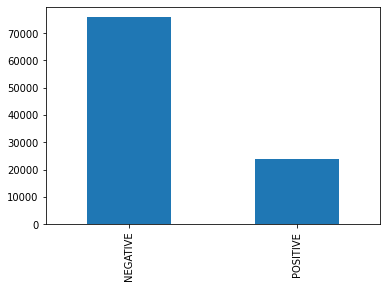

In [ ]:
dfsent.Sentiment.value_counts().plot.bar()

In [ ]:
dfsent.to_csv(path+'df_with_sent_2020.csv')

# Add topics to df

In [ ]:
dfsent[['Topic 0','Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9']]=0

In [ ]:
dfsent=pd.read_csv(path+'df_with_sent.csv')
dfsent

,Unnamed: 0,index,Unnamed: 0.1,date,type,link,title,Sentiment
0,0,0,0,20210401,news,/news/article-9429149/Watchdog-calls-ramblers-...,Minorities 'don't feel welcome in the countrys...,NEGATIVE
1,1,4,4,20210401,news,/news/article-9429143/Nurse-pay-app-goes-bust-...,Nurse pay app goes bust after finance company ...,NEGATIVE
2,2,10,10,20210401,news,/news/article-9429131/Britain-comes-roaring-pa...,Factory growth hits ten-year high: Britain com...,POSITIVE
3,3,14,14,20210401,news,/news/article-9429125/UK-regulator-total-30-ca...,Seven British people died from a brain blood c...,NEGATIVE
4,4,22,22,20210401,news,/news/article-9429107/Drunken-Walmart-shoplift...,Fight breaks out in Walmart when customer take...,NEGATIVE
...,...,...,...,...,...,...,...,...
25932,25932,170706,170706,20210131,news,/news/article-9205993/Alleged-fraudster-Meliss...,Missing millionaire Melissa Caddick likely had...,NEGATIVE
25933,25933,170722,170722,20210131,news,/news/article-9205961/AFL-legend-Nathan-Buckle...,Has AFL legend Nathan Buckley found love with ...,NEGATIVE
25934,25934,170727,170727,20210131,news,/news/article-9205951/Hollywoods-super-rich-qu...,Hollywood's super rich are queue-jumping for C...,NEGATIVE
25935,25935,170735,170735,20210131,news,/news/article-9205935/Scott-Mitchell-says-disa...,Dame Barbara Windsor's husband Scott Mitchell ...,NEGATIVE


In [ ]:
for i in tqdm.tqdm(range(len(dfsent))): 
  scores=lda_model[bow_corpus[i]]
  for score in scores:
    id=score[0]
    value=score[1]

    dfsent.loc[i,'Topic '+str(id)]=value


100%|██████████| 99688/99688 [09:37<00:00, 172.76it/s]


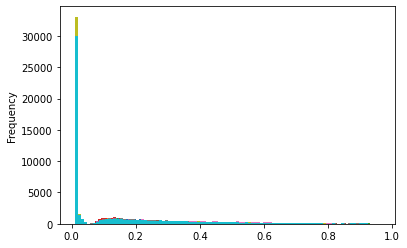

In [ ]:
for i in range(10):
  dfsent['Topic ' +str(i)].plot.hist(bins=100)

In [ ]:
# dfsent=dfsent.drop(['Unnamed: 0','index','Unnamed: 0.1'],axis=1)
dfsentTopics=dfsent[['Topic 0','Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10']]
dfsentTopics=dfsentTopics.mask(dfsentTopics < 0.05)

In [ ]:
dfsent=dfsent.drop(['Topic 0','Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10'],axis=1)

In [ ]:
dfsent_clean=pd.concat([dfsent,dfsentTopics],axis=1)

In [ ]:
dfsent_clean

,index,Unnamed: 0,Unnamed: 0.1,date,type,link,title,Sentiment,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,0,0,0.0,20201201,news,/news/article-9007815/NSW-Central-Coast-Diamon...,Terrifying moment a diamond python slithers do...,NEGATIVE,NaN,0.441558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.441549,NaN
1,10,10,10.0,20201201,news,/news/article-9007795/Cost-class-stamps-rise-7...,Cost of first class stamp rises 9 pence to 85p...,NEGATIVE,NaN,NaN,0.496134,0.247465,NaN,NaN,NaN,NaN,NaN,0.165490,NaN
2,15,15,15.0,20201201,news,/news/article-9007785/Cop-shot-injured-naked-u...,Cop is fired for shooting an unarmed naked man...,POSITIVE,NaN,0.684476,NaN,NaN,0.224612,NaN,NaN,NaN,NaN,NaN,NaN
3,16,16,16.0,20201201,news,/news/article-9007783/San-Francisco-mayor-Lond...,San Francisco mayor London Breed - who imposed...,NEGATIVE,NaN,NaN,NaN,NaN,NaN,0.375182,NaN,0.533898,NaN,NaN,NaN
4,18,18,18.0,20201201,news,/news/article-9007779/Ahmed-Jaghbir-jailed-11-...,The secret mistress and the ultimate betrayal:...,POSITIVE,0.341291,NaN,NaN,NaN,0.447800,NaN,NaN,NaN,NaN,0.130096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99683,601006,601006,NaN,20200131,news,/news/article-7950293/Mechanic-gets-crushed-de...,Mechanic gets crushed to death after car falls...,NEGATIVE,NaN,0.481322,0.382307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99684,601007,601007,NaN,20200131,news,/news/article-7950291/Fortnite-nerd-Luke-Munda...,"EXCLUSIVE: Fortnite nerd, 27, who live-streame...",NEGATIVE,NaN,NaN,0.111411,NaN,0.256999,NaN,0.558861,NaN,NaN,NaN,NaN
99685,601019,601019,NaN,20200131,news,/news/article-7950267/Trump-attacks-Democrats-...,Donald Trump mocks the 2020 Democrats - includ...,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,0.101830,NaN,NaN,NaN,0.823786
99686,601021,601021,NaN,20200131,news,/news/article-7950263/Woman-dressed-Minnie-Mou...,Shocking moment woman dressed as Minnie Mouse ...,NEGATIVE,NaN,0.917354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsent_clean.to_csv('dfsent_clean_2020.csv')

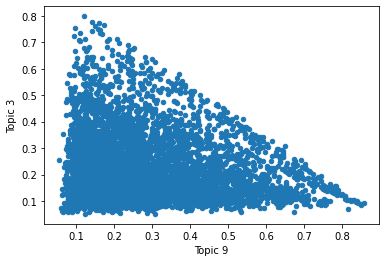

In [ ]:
dfsent_clean.plot.scatter(x='Topic 9',y='Topic 3')

# Trends in time

In [ ]:
dfsent_clean.date=pd.to_datetime(dfsent_clean.date,format='%Y%m%d')

In [ ]:
dfsent_clean=dfsent_clean.sort_values(by='date')
dfsent_clean['Year-Month']=dfsent_clean.date.dt.to_period('M')

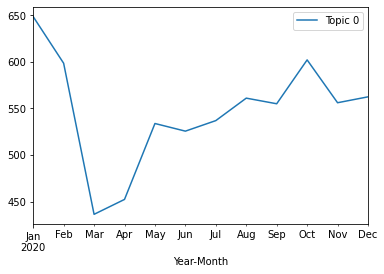

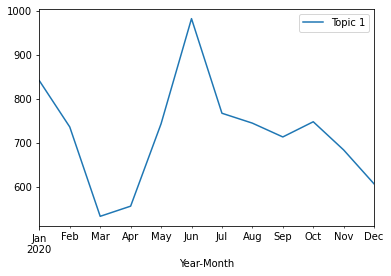

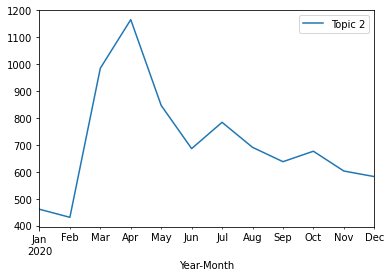

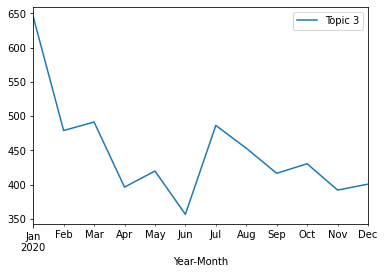

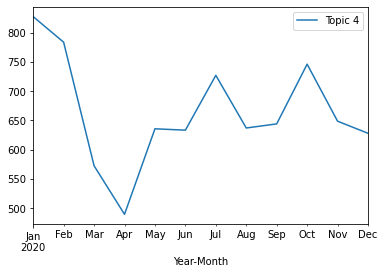

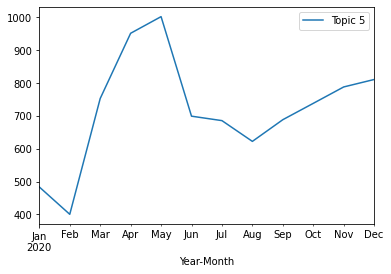

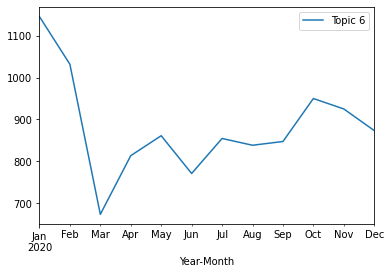

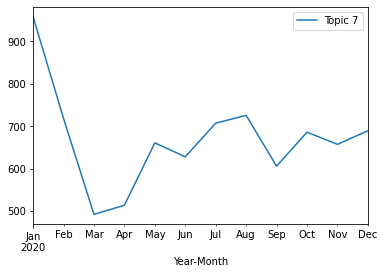

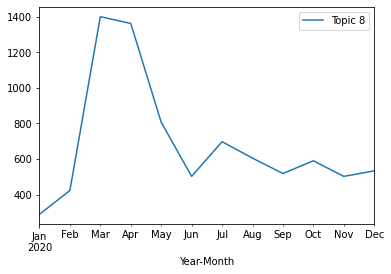

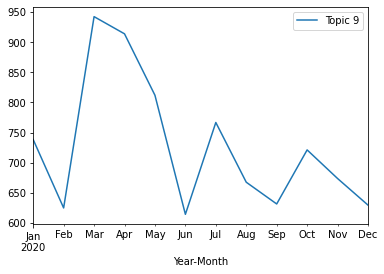

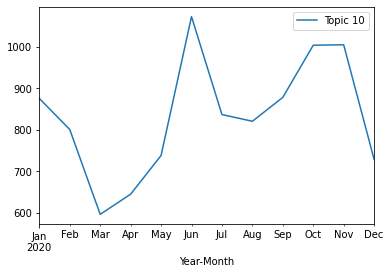

In [ ]:
for i in range(11):
  dfsent_clean[['Year-Month','Topic '+str(i)]].groupby('Year-Month').sum().plot()

# Sentiment of topics

In [ ]:
df_topic_0=dfsent_clean[['title','Topic 0','Sentiment']]
df_topic_0=df_topic_0[~df_topic_0['Topic 0'].isna()].copy()

In [ ]:
for i in range(10):
  topic='Topic '+str(i)
  df_topic=dfsent_clean[['title',topic,'Sentiment']]
  df_topic=df_topic[~df_topic[topic].isna()].copy() 

  lenall=len(df_topic)
  lenbad=len(df_topic[df_topic.Sentiment=='NEGATIVE'])
  percbad=np.round(lenbad/lenall*100)


  print('Topic {} had {}% Negative sentiment'.format(i,percbad))
  

Topic 0 had 73.0% Negative sentiment
Topic 1 had 77.0% Negative sentiment
Topic 2 had 79.0% Negative sentiment
Topic 3 had 72.0% Negative sentiment
Topic 4 had 83.0% Negative sentiment
Topic 5 had 76.0% Negative sentiment
Topic 6 had 70.0% Negative sentiment
Topic 7 had 72.0% Negative sentiment
Topic 8 had 79.0% Negative sentiment
Topic 9 had 78.0% Negative sentiment


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.042*"school" + 0.025*"student" + 0.022*"year" + 0.021*"post" + 0.019*"children" + 0.018*"look" + 0.017*"photo" + 0.016*"reveal" + 0.016*"like" + 0.015*"deal"
Topic: 1 
Words: 0.058*"polic" + 0.047*"moment" + 0.027*"driver" + 0.026*"offic" + 0.021*"shock" + 0.019*"arrest" + 0.017*"cop" + 0.015*"woman" + 0.014*"protest" + 0.013*"show"
Topic: 2 
Words: 0.081*"coronavirus" + 0.036*"case" + 0.030*"death" + 0.023*"china" + 0.020*"warn" + 0.018*"york" + 0.017*"second" + 0.017*"record" + 0.016*"covid" + 0.016*"infect"
Topic: 3 
Words: 0.031*"princ" + 0.029*"harri" + 0.027*"british" + 0.023*"meghan" + 0.023*"star" + 0.022*"flight" + 0.020*"royal" + 0.019*"travel" + 0.017*"hotel" + 0.015*"quarantin"
Topic: 4 
Words: 0.043*"year" + 0.037*"murder" + 0.036*"jail" + 0.033*"charg" + 0.028*"accus" + 0.023*"court" + 0.017*"prison" + 0.017*"claim" + 0.017*"women" + 0.016*"victim"
Topic: 5 
Words: 0.034*"lockdown" + 0.029*"warn" + 0.028*"coronavirus" + 0.028*"bori" + 0.026*"johnson" + 

# GANs 

## Pre-traininjg classifier: Sentiment classification

In [4]:
!pip install simpletransformers

     |████████████████████████████████| 215kB 7.4MB/s 
     |████████████████████████████████| 122kB 25.8MB/s 
     |████████████████████████████████| 1.2MB 21.6MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 8.2MB 41.6MB/s 
     |████████████████████████████████| 2.1MB 54.4MB/s 
     |████████████████████████████████| 194kB 57.9MB/s 
     |████████████████████████████████| 2.1MB 52.8MB/s 
     |████████████████████████████████| 3.3MB 50.4MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
     |████████████████████████████████| 4.2MB 51.7MB/s 
     |████████████████████████████████| 163kB 60.2MB/s 
     |████████████████████████████████| 81kB 12.3MB/s 
     |████████████████████████████████| 112kB 59.7MB/s 
     |████████████████████████████████| 133kB 56.7MB/s 
     |████████████████████████████████| 102kB 15.0MB/s 
     |████████████████████████████████| 112kB 57.2MB/s 
     |████████████████████████████████| 245kB 58.2MB/

In [3]:
import simpletransformers

In [4]:
df_all=pd.read_csv(path+'df_with_sent_2020.csv')
df_all=df_all[['title','Sentiment']]

In [5]:
df_all['title']=df_all['title'].astype("string")
df_all['Sentiment']=pd.get_dummies(df_all['Sentiment'],drop_first=True)

In [6]:
df_all

,title,Sentiment
0,Terrifying moment a diamond python slithers do...,0
1,Cost of first class stamp rises 9 pence to 85p...,0
2,Cop is fired for shooting an unarmed naked man...,1
3,San Francisco mayor London Breed - who imposed...,0
4,The secret mistress and the ultimate betrayal:...,1
...,...,...
99683,Mechanic gets crushed to death after car falls...,0
99684,"EXCLUSIVE: Fortnite nerd, 27, who live-streame...",0
99685,Donald Trump mocks the 2020 Democrats - includ...,0
99686,Shocking moment woman dressed as Minnie Mouse ...,0


In [7]:
df_all=df_all.rename(columns={'title':'text','Sentiment':'labels'})

In [8]:
df_all.labels=df_all.labels.astype('int')
df_all.dtypes

text      string
labels     int64
dtype: object

In [9]:
from sklearn.model_selection import train_test_split

train_df, eval_df = train_test_split(df_all, test_size=0.2)

In [10]:
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('roberta', 'roberta-base')

# Train the model
model.train_model(train_df)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

  0%|          | 0/79750 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/9969 [00:00<?, ?it/s]

  0%|          | 0/19938 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/2493 [00:00<?, ?it/s]

In [66]:
true=eval_df.labels.values
pred=model_outputs[:,1]
pred[pred<=0]=0
pred[pred>0]=1

array([0., 1., 0., ..., 0., 0., 0.])

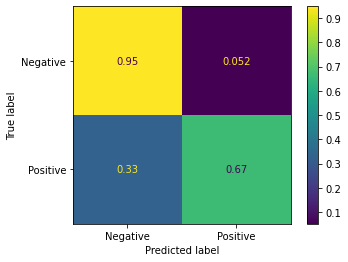

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(true, pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Negative','Positive'])
disp.plot()